# Homework 1
Giovanni Sciortino s302959 \\
Giuseppe Suriano s296605


## Exercise 1
Start drawing the graph

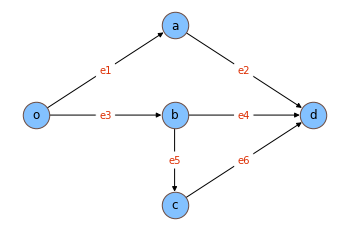

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
edges = (('o','a'), ('o','b'), ('a','d'), ('b','c'), ('b','d'), ('c','d'))
G.add_edges_from(edges) # add edges to the graph

pos = {'o':[0,1], 'a':[1,2], 'b':[1,1], 'c':[1,0], 'd':[2,1]} # set positions of nodes to have the same disposition of the given figure

nx.draw_networkx_edge_labels(G, pos, rotate=False,
                             edge_labels={('o','a'):'e1',('a','d'):'e2',('o','b'):'e3',('b','d'):'e4',('b','c'):'e5',('c','d'):'e6'}, 
                             font_color='#DD2C00') # set the edge label for each link

G['a']['d']['capacity'] = 1
G['b']['d']['capacity'] = 1
G['c']['d']['capacity'] = 1
G['o']['a']['capacity'] = 2
G['o']['b']['capacity'] = 2
G['b']['c']['capacity'] = 2

fig = plt.figure(1,figsize = (5,5))

options = {"edgecolors": "#6D4C41", "node_size": 700}
nx.draw(G, pos, with_labels = True, node_color="#83C1FF", **options)

plt.savefig("Graph_ex1_e.svg")

### Point a
The min cut capacity is the sum of the edges' capacities that goes from the partition U (including o) to the partition V (including d). This is the minimal aggregate capacity that hisolates o to d in a way to not have a feasible flow.

In [ ]:
nx.algorithms.flow.minimum_cut(G,'o','d')

(3, ({'a', 'b', 'c', 'o'}, {'d'}))

The infimum of total capacity $C^*_{o,d}$ that needs to be removed to not exist unit flows from 'o' to 'd' is the min-cut capacity $C^*_{o,d}$, so the minimum between the previous capacities $C_U$
$$
C^*_{o,d} = \min\{C_1+C_3,  C_1+C_4+C_5,  C_1+C_4+C_6,  C_2+C_3,  C_2+C_4+C_5,  C_2+C_4+C_6\}
$$
In this case the minimum cut performed by the function divides the graph is two subgraphs:\{ a, b, c, o } and \{ d }. In this case the edge cutted are $$ C_2+C_4+C_5 $$ with capacity 3.

### Point b

In [ ]:
sum_flow = 0
tot_cap = 0
for diz in nx.algorithms.flow.maximum_flow(G,'o','d')[1].values():
  for val in diz.values():
    sum_flow += val

for edge in G.edges:
  tot_cap += G[edge[0]][edge[1]]['capacity']

print(f"The sum of all elements that compose the optimal flow is {sum_flow}")
print(f"The sum of all edges'capacities is {tot_cap}")

The sum of all elements that compose the optimal flow is 7
The sum of all edges'capacities is 9


The maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from o to d is sum of all the residual capacities of the links considering the optimal flow (for the max flow problem). The residual capacities are defined as the difference of the link's capacity and the flow in that edge.

In [ ]:
print(f"Maximum aggregate capacity that can be removed : {tot_cap - sum_flow}")

Maximum aggregate capacity that can be removed : 2


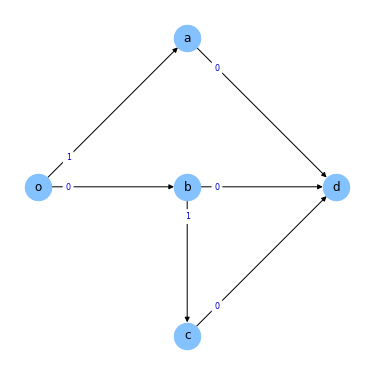

In [ ]:
max_flow = nx.algorithms.flow.maximum_flow(G,'o','d')
flow_labels = dict()

for k, v_i in max_flow[1].items():
    for v_j, flow in v_i.items():
        flow_labels[(k,v_j)] = flow

residual_cap_labels = dict()
for edge in G.edges:
    # compute the residual capacity
    residual_cap_labels[edge] = G[edge[0]][edge[1]]['capacity'] - flow_labels[edge]

fig = plt.figure(1,figsize = (5,5))

options = {"edge_color": "black", "node_size": 700}
nx.draw(G, pos, with_labels = True, node_color="#83C1FF", **options)
nx.draw_networkx_edge_labels(G, pos, edge_labels=residual_cap_labels, font_color='#0000CC', label_pos=0.8, rotate=False, font_size=8)
plt.savefig("Graph_ex1b.svg")

As it can seen above the residual capacity of the graph in case of maximum flow are on the edge $C_1$(o-a) and $C_5$(b-c) and the aggreate is of these residual capacities is equal to 2. Meaning that the maximum aggregate capacity that can be removed from the links without af- fecting the maximum throughput is 2.

### Point c


In [ ]:
num = 15
result = []
for x in np.arange(1,num):
  min_cut=nx.algorithms.flow.minimum_cut(G,'o','d')
  cut_val = min_cut[0]
  
  # origin partition
  u = min_cut[1][0]

  # destination partition
  v = min_cut[1][1]

  # candidates to add capacity
  to_add = []

  for edge in G.edges :
    if edge[0] in u and edge[1] in v:
      to_add.append(edge)

  
  maximum = 0
  for edge in to_add:

    # try to add capacity and check new min cut capacity
    G[edge[0]][edge[1]]['capacity'] += 1
    new_cut = nx.algorithms.flow.minimum_cut(G,'o','d')[0]

    # if the new cut capacity is greater we add capacity to this edge
    if maximum < new_cut:
      maximum = new_cut
      G[edge[0]][edge[1]]['capacity'] += 1
      
    G[edge[0]][edge[1]]['capacity'] -= 1


  result.append(maximum)

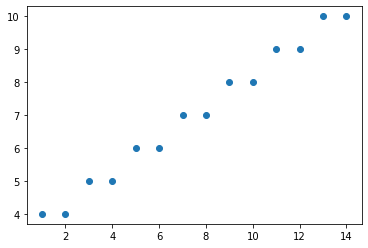

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.arange(1,num)
ypoints = np.array(result)



plt.scatter(xpoints, ypoints)
plt.savefig("Graph_ex1c.svg")

## Exercise 2

Construct a simple bipartite graph representative of the interests

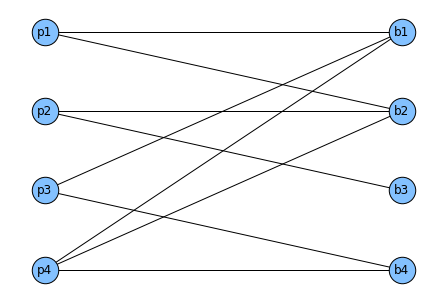

In [ ]:
BG = nx.Graph()
edges = (('p1','b1'), ('p1','b2'), ('p2','b2'), ('p2','b3'), ('p3','b1'), ('p3','b4'), ('p4','b1'), ('p4','b2'), ('p4','b4'))
BG.add_edges_from(edges) # add edges to the graph

pos_BG = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}

options = {"edgecolors": "black", "node_size": 700}
nx.draw(BG, pos_BG, with_labels=True, node_color="#83C1FF", **options)
#plt.savefig("Graph_ex2_undir.svg")

### Point a
In order to find a perfect matching we exploit the Ford Fulkenson algorithm

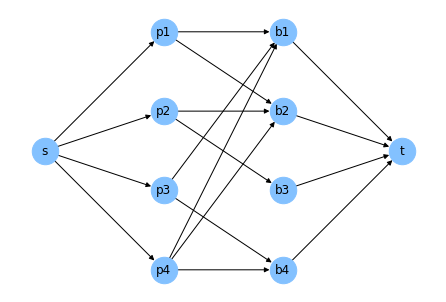

In [ ]:
#Construct the graph with a source and a target on the head and the tail of the bipartite graph
G1 = nx.DiGraph()
G1.add_edges_from(edges)
G1.add_edges_from([('s','p1'),('s','p2'),('s','p3'),('s','p4'),('b1','t'),('b2','t'),('b3','t'),('b4','t')])

pos_BG['s'] = [-1, 0.5]
pos_BG['t'] = [2, 0.5]

options = {"edge_color": "black", "node_size": 700}
nx.draw(G1,pos_BG,with_labels=True, node_color="#83C1FF", **options)

In [ ]:
#As in the Hall's theorem proof we construct with unitary edge weight
for edge in G1.edges:
  G1[edge[0]][edge[1]]['capacity'] = 1
max_flow=nx.algorithms.flow.maximum_flow(G1,'s','t')
print(max_flow)

(4, {'p1': {'b1': 0, 'b2': 1}, 'b1': {'t': 1}, 'b2': {'t': 1}, 'p2': {'b2': 0, 'b3': 1}, 'b3': {'t': 1}, 'p3': {'b1': 1, 'b4': 0}, 'b4': {'t': 1}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 's': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 't': {}})


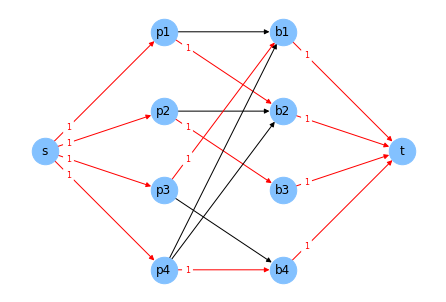

In [ ]:
flow_labels = dict()
colors = []
boolean = True

for edge in G1.edges:
  for k, v_i in max_flow[1].items():
    for v_j, flow in v_i.items():
      if boolean==True and flow==1:
             flow_labels[(k,v_j)] = flow  
      if edge[0]==k and edge[1]==v_j:
        if flow == 1:
          colors.append("red")
        else:
          colors.append("black")
  boolean =False

options ={"edge_color":colors, "node_size": 700}
nx.draw(G1, pos_BG, with_labels = True, node_color="#83C1FF", **options, )
nx.draw_networkx_edge_labels(G1, pos_BG, edge_labels=flow_labels, font_color='red', label_pos=0.8, rotate=False, font_size=8)
plt.savefig("Graph_ex2a.svg")

As can be seen in the Figure the throughput of the maximum flow of the graph is 4 that is equal to the cardinality of the nodes representig the persons and the books. So there is a perfect matching on the initial bipartate graph.

### Point b

In [ ]:
book_cap = {'b1':2, 'b2':3, 'b3':2, 'b4':2}
for edge in G1.edges:
  if edge[0] == 's':
    G1[edge[0]][edge[1]]['capacity'] = float('inf')
  elif edge[1] == 't':
    G1[edge[0]][edge[1]]['capacity'] = book_cap[edge[0]]
  else:
    G1[edge[0]][edge[1]]['capacity'] = 1

In [ ]:
nx.algorithms.flow.maximum_flow(G1,'s','t')

(8,
 {'p1': {'b1': 0, 'b2': 1},
  'b1': {'t': 2},
  'b2': {'t': 3},
  'p2': {'b2': 1, 'b3': 1},
  'b3': {'t': 1},
  'p3': {'b1': 1, 'b4': 1},
  'b4': {'t': 2},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1},
  's': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3},
  't': {}})

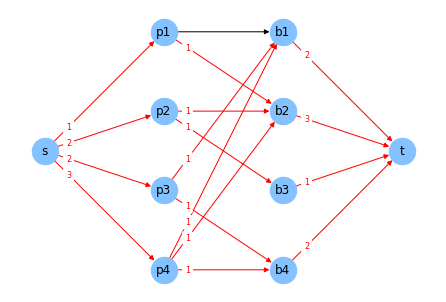

In [ ]:
flow_labels = dict()
colors = []
boolean = True

for edge in G1.edges:
  for k, v_i in max_flow[1].items():
    for v_j, flow in v_i.items():
      if boolean==True and flow!= 0:
             flow_labels[(k,v_j)] = flow  
      if edge[0]==k and edge[1]==v_j:
        if flow != 0:
          colors.append("red")
        else:
          colors.append("black")
  boolean =False

options ={"edge_color":colors, "node_size": 700}
nx.draw(G1, pos_BG, with_labels = True, node_color="#83C1FF", **options, )
nx.draw_networkx_edge_labels(G1, pos_BG, edge_labels=flow_labels, font_color='red', label_pos=0.8, rotate=False, font_size=8)
plt.savefig("Graph_ex2b.svg")

### Point c
Since the throughput of the maximum flow computed in the previous step is 9, in order to make this point of the problem can have a solution, we interpret the problem assuming that each person can not take more copies of the same book.


In [ ]:
G2 = G1.copy()
#nx.draw(G2,pos_BG,with_labels=True, node_color="#83C1FF", **options)
book_cap = {'b1':2, 'b2':3, 'b3':2, 'b4':2}

opt_flow = nx.algorithms.flow.maximum_flow(G2,'s','t')[1]

for book in book_cap.keys() :
  if opt_flow[book]['t'] != book_cap[book]:
    to_sell = book
    print( f'Book {to_sell} can be sold by the library' )

for edge in G2.edges:
  if edge[0] == 's':
    continue
  elif edge[1] == 't':
    continue
  else:
    if edge[1] != to_sell:
      if opt_flow[edge[0]][edge[1]] == 0:
        print (f'The library can buy another copy of the book {edge[1]} ')


Book b3 can be sold by the library
The library can buy another copy of the book b1 


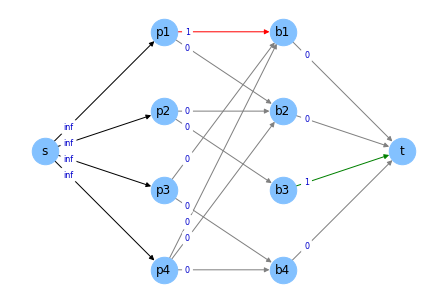

In [ ]:
max_flow = nx.algorithms.flow.maximum_flow(G2,'s','t')
flow_labels = dict()

for k, v_i in max_flow[1].items():
    for v_j, flow in v_i.items():
        flow_labels[(k,v_j)] = flow

residual_cap_labels = dict()
color=[]
for edge in G2.edges:
    # compute the residual capacity
    residual_cap_labels[edge] = G2[edge[0]][edge[1]]['capacity'] - flow_labels[edge]

    if residual_cap_labels[edge] == 1 and edge[1] == 't':
      color.append("green")
    elif residual_cap_labels[edge] == 1 and edge[1] == 'b1' and edge[0]=='p1':
      color.append("red")
    elif residual_cap_labels[edge] == 0:
      color.append("grey")
    else:
      color.append("black")


options = {"edge_color": color, "node_size": 700}
nx.draw(G2, pos_BG, with_labels = True, node_color="#83C1FF", **options)
nx.draw_networkx_edge_labels(G2, pos_BG, edge_labels=residual_cap_labels, font_color='#0000CC', label_pos=0.8, rotate=False, font_size=8)
plt.savefig("Graph_ex2c.svg")

## Exercise 3

In [ ]:
import scipy.io
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import cvxpy as cp

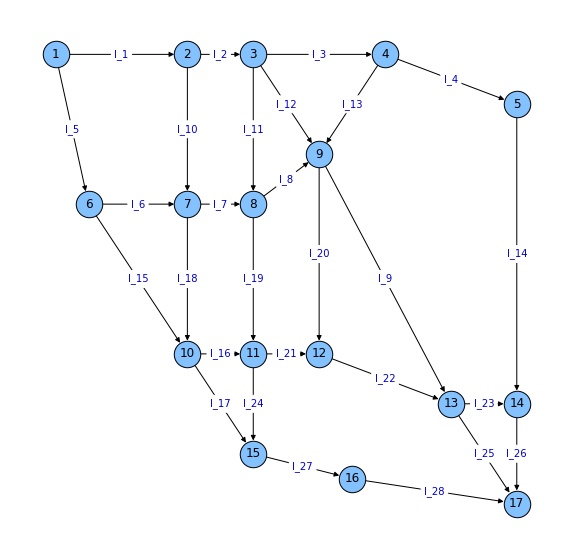

In [ ]:
flow = scipy.io.loadmat('/content/flow.mat')["flow"].reshape(28,)
capacities = scipy.io.loadmat('/content/capacities.mat')["capacities"].reshape(28,)
traffic = scipy.io.loadmat('/content/traffic.mat')["traffic"]
traveltime = scipy.io.loadmat('/content/traveltime.mat')["traveltime"].reshape(28,)

# During the various steps, we will use the following facts:
# - the i-th column of the traffic matrix 
#   is associated with the i-th element of the capacities vector, 
#   with the i-th element of the flow vector and  with the i-th element of the travel time.
# - when we read edges from networkx, we read them in the order we added them,
#   so, if we add them according to the order followed in the traffic matrix, we can exploit the previous fact.
# In this way, we will simplify the code.

LA = nx.DiGraph()

LA_edges_names = dict()
LA_names_edges = dict()
LA_edges_list = []
edges = {}

for j, col in enumerate(traffic.T):
    tail = -1
    head = -1

    for i, node in enumerate(col):
        if node == 1:
            tail = i + 1 # +1 because nodes enumeration starts from 1, while i starts from 0
        elif node == -1:
            head = i + 1 # +1 because nodes enumeration starts from 1, while i starts from 0
        
        if tail != -1 and head != -1:
            edges[(tail,head)] = j
            LA.add_edge(tail, head, capacity=capacities[j], weight=traveltime[j], minlen=1000)
            LA_edges_names[(tail, head)] = f"l_{j+1}" # this dictionary is usefull to associate edges names to edges
            LA_names_edges[f"l_{j+1}"] = (tail, head) # this dictionary is usefull to associate edges to edges names
            LA_edges_list.append(f"l_{j+1}") # we will use this list to associates capacities, flows and travel time with edges names
            break # exit from the for loop
    

# Draw the network:
fig = plt.figure(1, figsize=(10,10))
pos_LA = {1:[0,10], 2:[2,10], 3:[3,10], 4:[5,10], 5:[7,9], 6:[0.5,7], 7:[2,7], 8:[3,7], 9:[4,8], 10:[2,4], 11:[3,4], 12:[4,4], 13:[6,3], 14:[7,3], 15:[3,2], 16:[4.5,1.5], 17:[7,1]}
nx.draw_networkx_edge_labels(LA, pos_LA, edge_labels=LA_edges_names, font_color='#0000CC', rotate=False)
options = {"edgecolors": "black", "node_size": 700}
nx.draw(LA, pos=pos_LA, with_labels = True, node_color="#83C1FF", **options)
#plt.savefig("Graph_ex3.svg")

In [ ]:
# define the delay function
def delay_function(C,l,f):
    return l/(1-f/C)

### Point a

The shortest (fastest) path is [1, 2, 3, 9, 13, 17], and the time needed to travel on it is 0.532996 hours


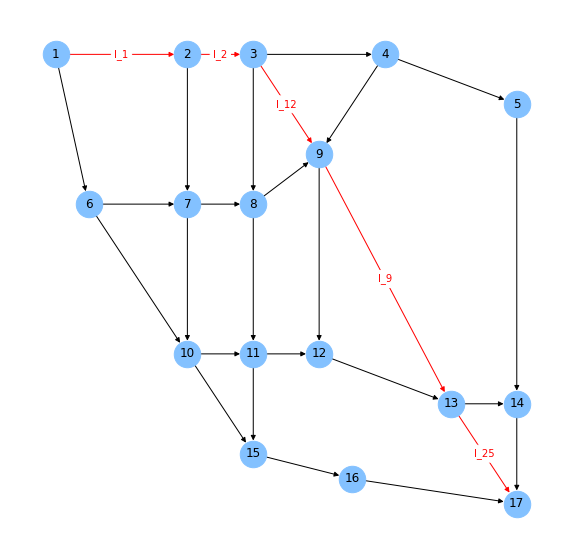

In [ ]:
shortestpath = nx.shortest_path(LA, 1, 17, weight='weight')
print(f"The shortest (fastest) path is {shortestpath}, and the time needed to travel on it is {nx.shortest_path_length(LA, 1, 17, weight='weight')} hours")
colors=[]
shortestpath_edges_name=  {}
for u, v in LA.edges:
  if u in shortestpath and v in shortestpath:
    shortestpath_edges_name[(u,v)] = LA_edges_names[(u,v)]
    colors.append('red')
  else:
    colors.append('black')
fig = plt.figure(1, figsize=(10,10))
nx.draw_networkx_edge_labels(LA, pos_LA, edge_labels=shortestpath_edges_name, font_color='red', rotate=False)
options = {"edge_color": colors, "node_size": 700}
nx.draw(LA, pos=pos_LA, with_labels = True, node_color="#83C1FF", **options)
plt.savefig("Graph_ex3a.svg")

We can see the same result with cvxpy library

In [ ]:
import cvxpy as cp

n_edges = len(LA.edges)

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(len(LA.nodes))
nu[0] = 1
nu[16] = -1

# 'traveltime' stores the coefficients of the linear terms of the objective function,
# in this case, the time necessary to travel the links when they are empty.

# The objective function is:
f = cp.Variable(n_edges)
objective = cp.Minimize(traveltime.T @ f)
constraints = [traffic @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by 'prob.solve()'.
result = prob.solve()

# The optimal value for f is stored in 'f.value'.
optimal_f = dict(zip(LA_edges_list, f.value))
print("Optimal f:", optimal_f)

Optimal f: {'l_1': 0.9999999998500139, 'l_2': 0.9999999998411118, 'l_3': 1.1959558551414862e-11, 'l_4': 5.071295656956073e-12, 'l_5': 1.499884260493561e-10, 'l_6': 1.336589190721313e-10, 'l_7': 8.541009510525796e-11, 'l_8': 3.7826669318549144e-11, 'l_9': 0.9999999978385767, 'l_10': 8.90389208415427e-12, 'l_11': 3.9175321536009936e-11, 'l_12': 0.9999999997899784, 'l_13': 6.889814342358151e-12, 'l_14': 5.077522016813481e-12, 'l_15': 1.6287839702232243e-11, 'l_16': 5.422086401733019e-11, 'l_17': 1.9183146876831898e-11, 'l_18': 5.712747979162923e-11, 'l_19': 8.67469798326008e-11, 'l_20': 1.9961194579318533e-09, 'l_21': 1.2935867026206884e-10, 'l_22': 2.1254793470743926e-09, 'l_23': 4.1493934269348425e-11, 'l_24': 1.1613383418047821e-11, 'l_25': 0.9999999999225629, 'l_26': 4.658717144643899e-11, 'l_27': 3.083306875531489e-11, 'l_28': 3.084944863117309e-11}


In [ ]:
tol = 1e-5
shortest_path = []

for k, f in optimal_f.items():
    if f > tol:
        shortest_path.append(k)
        
print(shortest_path)

['l_1', 'l_2', 'l_9', 'l_12', 'l_25']


### Point b

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {12: 7068, 13: 6297},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  12: {13: 7893},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  15: {16: 8258},
  16: {17: 8258},
  17: {}})


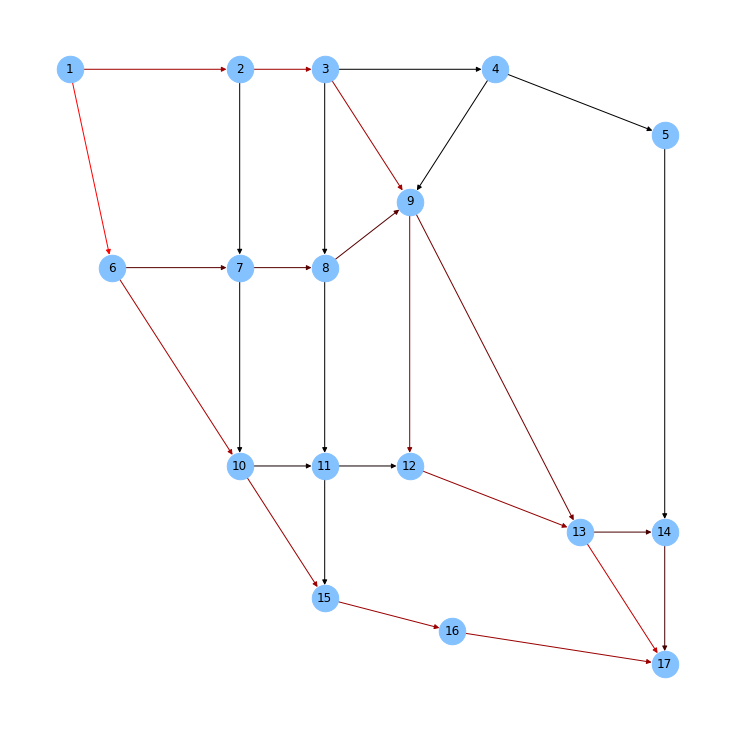

In [ ]:
maximum_flow = nx.algorithms.flow.maximum_flow(LA, 1, 17)
pprint(maximum_flow)
fe_max = max([f for k,v in maximum_flow[1].items() for u,f in v.items()])
colors = [[maximum_flow[1][u][v]/fe_max, 0, 0] for u,v in LA.edges] #per dare una tonalità di colore diversa in base al flow sugli edge 

fig = plt.figure(1, figsize=(10,10))
options = {"edge_color": colors, "node_size": 700}
nx.draw(LA, pos=pos_LA, with_labels = True, node_color="#83C1FF", **options)


### Point c

In [ ]:
# external inflow v computation
v_computed = traffic @ flow
print(v_computed)

v = np.zeros(v_computed.shape[0])
v[0] = v_computed[0]
v[16] = - v_computed[0]
print(v)

[ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]
[ 16806.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0. -16806.]


from now on we will use this v

### Point d

In [ ]:
def compute_objective_optimum_flow(capacities, traveltime, f, point=None):
  cost = cp.sum(cp.multiply(traveltime*capacities, cp.inv_pos(1 - (f / capacities))) - traveltime*capacities)
  f=cp.reshape(f, (28, 1))
  traveltime = traveltime.reshape(28, 1)
  if point == 'f':
    return cp.Minimize(cost - traveltime.T @ f)
  return cp.Minimize(cost)
  

The social optimum flow vector is:
[6.64219910e+03 6.05893789e+03 3.13232779e+03 3.13232589e+03
 1.01638009e+04 4.63831664e+03 3.00634073e+03 2.54263460e+03
 3.13154448e+03 5.83261212e+02 1.45164550e-02 2.92659559e+03
 1.89781986e-03 3.13232589e+03 5.52548426e+03 2.85427264e+03
 4.88644874e+03 2.21523712e+03 4.63720641e+02 2.33768761e+03
 3.31799129e+03 5.65567890e+03 2.37310712e+03 1.99567283e-03
 6.41411626e+03 5.50543301e+03 4.88645073e+03 4.88645073e+03]

Optimal cost: 25943.62261121288


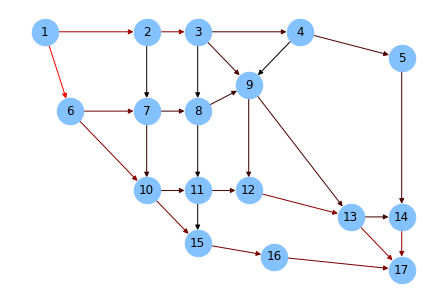

In [ ]:
B = traffic

f = cp.Variable(n_edges) # has shape (28, )

objective = compute_objective_optimum_flow(capacities, traveltime, f)
constraints = [B @ f == v, f >= 0,f <= capacities]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by 'prob.solve().
cost_opt = prob.solve()
# The optimal value for f is stored in 'f.value'.
opt_flow = f.value
#print("Social optimal flow:", opt_flow)
print(f"The social optimum flow vector is:\n{opt_flow}", end='\n\n')
print("Optimal cost:", cost_opt)
fe_max = max(opt_flow)
colors = [[opt_flow[edges[e]]/fe_max,0,0] for e in LA.edges]
options = {"edge_color": colors, "node_size": 700}
nx.draw(LA, pos=pos_LA, with_labels = True, node_color="#83C1FF", **options)

In [ ]:
delay_social = [delay_function(capacities[e], traveltime[e], opt_flow[e]) for e in range(28)]

print(delay_social)
print(opt_flow.T @ delay_social)

[0.6073468105240657, 0.1162222059769229, 0.16854621721255603, 0.26169382903867283, 0.5022522747591265, 0.23482861139109823, 0.15799860376268998, 0.09258426695481835, 0.2818223108367608, 0.11100164796225094, 0.10667017400525661, 0.15559526317823277, 0.11233002185810995, 0.26633767981086515, 0.31021211991561104, 0.1311403389890927, 0.11881125123495649, 0.0706136891649714, 0.03411200224136976, 0.045651704051793134, 0.10752406856948263, 0.23777421969227913, 0.1215247347996296, 0.054167011496291925, 0.2518091828035459, 0.18584263660211975, 0.2785016230650748, 0.3641402700284953]
25943.62261121288


### Point e1

In [ ]:
def compute_objective_wardrop_eq(capacities, traveltime, f):
  cost = cp.multiply(traveltime * capacities, cp.log(capacities)-cp.log(capacities - f))
  return cp.Minimize(cp.sum(cost))

The Wardrop optimal flow is:
[6.71564887e+03 6.71564494e+03 2.36740693e+03 2.36740660e+03
 1.00903510e+04 4.64539458e+03 2.80384448e+03 2.28356200e+03
 3.41848060e+03 3.93236508e-03 1.76827141e+02 4.17141087e+03
 3.27483440e-04 2.36740660e+03 5.44495644e+03 2.35317195e+03
 4.93333851e+03 1.84155403e+03 6.97109625e+02 3.03649260e+03
 3.05028112e+03 6.08677373e+03 2.58651209e+03 4.53191804e-04
 6.91874224e+03 4.95391869e+03 4.93333897e+03 4.93333897e+03]

Social cost of Wardrop equilibrium: 26292.963472061256


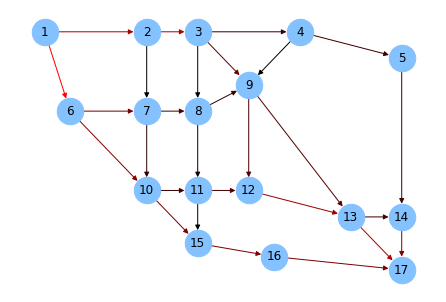

In [ ]:
f = cp.Variable(n_edges) 

objective_wardrop = compute_objective_wardrop_eq(capacities, traveltime, f)
constraints_wardrop = [B @ f == v, f >= 0]
prob_wardrop = cp.Problem(objective_wardrop, constraints_wardrop)

cost_opt_wardrop = prob_wardrop.solve()
opt_flow_wardrop = f.value
print(f"The Wardrop optimal flow is:\n{opt_flow_wardrop}", end='\n\n')

delay_wardrop = [delay_function(capacities[e], traveltime[e], opt_flow_wardrop[e]) for e in range(28)]

cost_wardrop = opt_flow_wardrop.T @ delay_wardrop

print("Cost of Wardrop equilibrium:", cost_wardrop)
fe_max = max(opt_flow_wardrop)
colors = [[opt_flow_wardrop[edges[e]]/fe_max,0,0] for e in LA.edges]
options = {"edge_color": colors, "node_size": 700}
nx.draw(LA, pos=pos_LA, with_labels = True, node_color="#83C1FF", **options)

In [ ]:
print("Price of Anarchy: ", cost_wardrop/cost_opt)

Price of Anarchy:  1.0134653847723405


### Point e2

In [ ]:
def compute_objective_wardrop_eq_with_tolls(capacities, traveltime, f, opt_flow, point=None):
  f = cp.reshape(f,(28,1))
  capacities = capacities.reshape(28, 1)
  traveltime = traveltime.reshape(28, 1)
  L_C = traveltime * capacities
  first = L_C * np.log(capacities)
  second = cp.multiply(L_C,cp.log(capacities - f))
  integral_delay = first - second

  # compute the tolls:
  F_C = opt_flow * capacities
  num = F_C * traveltime
  den = (capacities - opt_flow)**(-2) 
  tolls =  num * den
  if point == 'f':
    return cp.Minimize(cp.sum(integral_delay + cp.multiply(tolls, f)) - traveltime.T @ f)
  return cp.Minimize(cp.sum(integral_delay + cp.multiply(tolls,f)))

In [ ]:
f = cp.Variable(n_edges) # has shape (28, )

# we retrieve the optimal flow computed previously in point d, that is needed to compute che tolls
opt_flow_new = opt_flow#.reshape(28,1)
opt_flow_new=opt_flow_new.reshape(28,1)

objective_wardrop_tolls = compute_objective_wardrop_eq_with_tolls(capacities, traveltime, f, opt_flow_new)
constraints_wardrop_tolls = [traffic @ f == v, f >= 0]
prob_wardrop_tolls = cp.Problem(objective_wardrop_tolls, constraints_wardrop_tolls)

# The optimal objective value is returned by 'prob.solve()'.
cost_opt_wardrop_tolls = prob_wardrop_tolls.solve()
# The optimal value for f is stored in 'f.value'.
opt_flow_wardrop_tolls = f.value
print(f"The Wardrop equilibrium with tolls optimal flow is:\n{opt_flow_wardrop_tolls}", end='\n\n')
#print("Wardrop with tolls optimal flow:", opt_flow_wardrop_tolls)

delay_wardrop_tolls = [delay_function(capacities[e], traveltime[e], opt_flow_wardrop_tolls[e]) for e in range(28)]

social_cost_wardrop_tolls = opt_flow_wardrop_tolls.T @ delay_wardrop_tolls

print("Cost of Wardrop equilibrium with tolls:", social_cost_wardrop_tolls)

The Wardrop equilibrium with tolls optimal flow is:
[6.64297514e+03 6.05907639e+03 3.13247129e+03 3.13247120e+03
 1.01630248e+04 4.63825844e+03 3.00632588e+03 2.54233566e+03
 3.13148981e+03 5.83898752e+02 3.93932003e-04 2.92660470e+03
 9.82102660e-05 3.13247120e+03 5.52476638e+03 2.85422676e+03
 4.88637093e+03 2.21583131e+03 4.63990620e+02 2.33745064e+03
 3.31821725e+03 5.65566790e+03 2.37303631e+03 1.23274734e-04
 6.41412140e+03 5.50550751e+03 4.88637105e+03 4.88637105e+03]

Social cost of Wardrop equilibrium with tolls: 25943.622626298733


### Point f

In [ ]:
def new_delay_function(C,l,f):
    return l/(1-f/C) - l

In [ ]:
# As explained in the report, the only change w.r.t. the previous code
# is the presence of the term " - traveltime_new.T @ f_new "
# inside the objective functions.

# SOCIAL

f = cp.Variable(n_edges) # has shape (28, )

objective = compute_objective_optimum_flow(capacities, traveltime, f, 'f')
constraints = [traffic @ f == v, f >= 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print(f"Social optimal flow::\n{opt_flow}", end='\n\n')

print("Optimal cost:", cost_opt,end='\n\n')


# WARDROP WITH TOLLS

f_wardrop_tolls = cp.Variable(n_edges) # has shape (28, )

opt_flow_new = opt_flow.reshape(28, 1)

objective_wardrop_tolls = compute_objective_wardrop_eq_with_tolls(capacities, traveltime, f_wardrop_tolls, opt_flow_new, 'f')
constraints_wardrop_tolls = [traffic @ f_wardrop_tolls == v, f_wardrop_tolls >= 0]
prob_wardrop_tolls = cp.Problem(objective_wardrop_tolls, constraints_wardrop_tolls)

# The optimal objective value is returned by `prob.solve()`.
cost_opt_wardrop_tolls = prob_wardrop_tolls.solve()
# The optimal value for f is stored in `f.value`.
opt_flow_wardrop_tolls = f_wardrop_tolls.value

print(f"Wardrop with tolls optimal flow:\n{opt_flow_wardrop_tolls}", end='\n\n')

delay_wardrop_tolls = []
for e in range(28):
    delay_wardrop_tolls.append(new_delay_function(capacities[e], traveltime[e], opt_flow_wardrop_tolls[e]))

social_cost_wardrop_tolls = opt_flow_wardrop_tolls.T @ delay_wardrop_tolls

print("Cost of Wardrop equilibrium with tolls:", social_cost_wardrop_tolls)

Social optimal flow::
[6.65326049e+03 5.77465810e+03 3.41974720e+03 3.41974127e+03
 1.01527395e+04 4.64270104e+03 3.10584825e+03 2.66217967e+03
 3.00906114e+03 8.78602390e+02 7.47261013e-03 2.35490342e+03
 5.93671883e-03 3.41974127e+03 5.51003847e+03 3.04369304e+03
 4.88180062e+03 2.41545518e+03 4.43676052e+02 2.00802789e+03
 3.48736711e+03 5.49539501e+03 2.20377719e+03 1.97379951e-03
 6.30067895e+03 5.62351846e+03 4.88180259e+03 4.88180259e+03]

Optimal cost: 15095.513513665323

Wardrop with tolls optimal flow:
[6.65336598e+03 5.77546849e+03 3.41941782e+03 3.41941652e+03
 1.01526339e+04 4.64273344e+03 3.10549439e+03 2.66172892e+03
 3.00921686e+03 8.77897488e+02 1.60401081e-03 2.35604907e+03
 1.30333772e-03 3.41941652e+03 5.50990049e+03 3.04332449e+03
 4.88171253e+03 2.41513654e+03 4.43767068e+02 2.00856243e+03
 3.48709099e+03 5.49565343e+03 2.20402891e+03 5.70695017e-04
 6.30084138e+03 5.62344543e+03 4.88171310e+03 4.88171310e+03]

Cost of Wardrop equilibrium with tolls: 15095.5130364